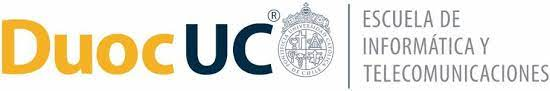

# Evaluación 2: Caso Forma C


Integrantes: 
*   **Cristóbal Cabezas Espinoza**
*   **Jorge López Soto**

Docente: Marco Antonio Japke Adriasola

Sección: DLY0100-003V

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP) 


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

In [40]:
# Importamos librerias
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
from keras.optimizers import SGD, Adam

In [3]:
# Cargamos nuestro dataset, el cual lo importamos de la libreria de keras
(imgs,labs), _ = keras.datasets.cifar10.load_data()
print(imgs.shape)
print(labs.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)


Nuestro dataset cuenta con 50000 imágenes, cada una de un tamaño de 32x32. 

In [4]:
# Con esta lista etiquetamos las clases de las imagenes
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

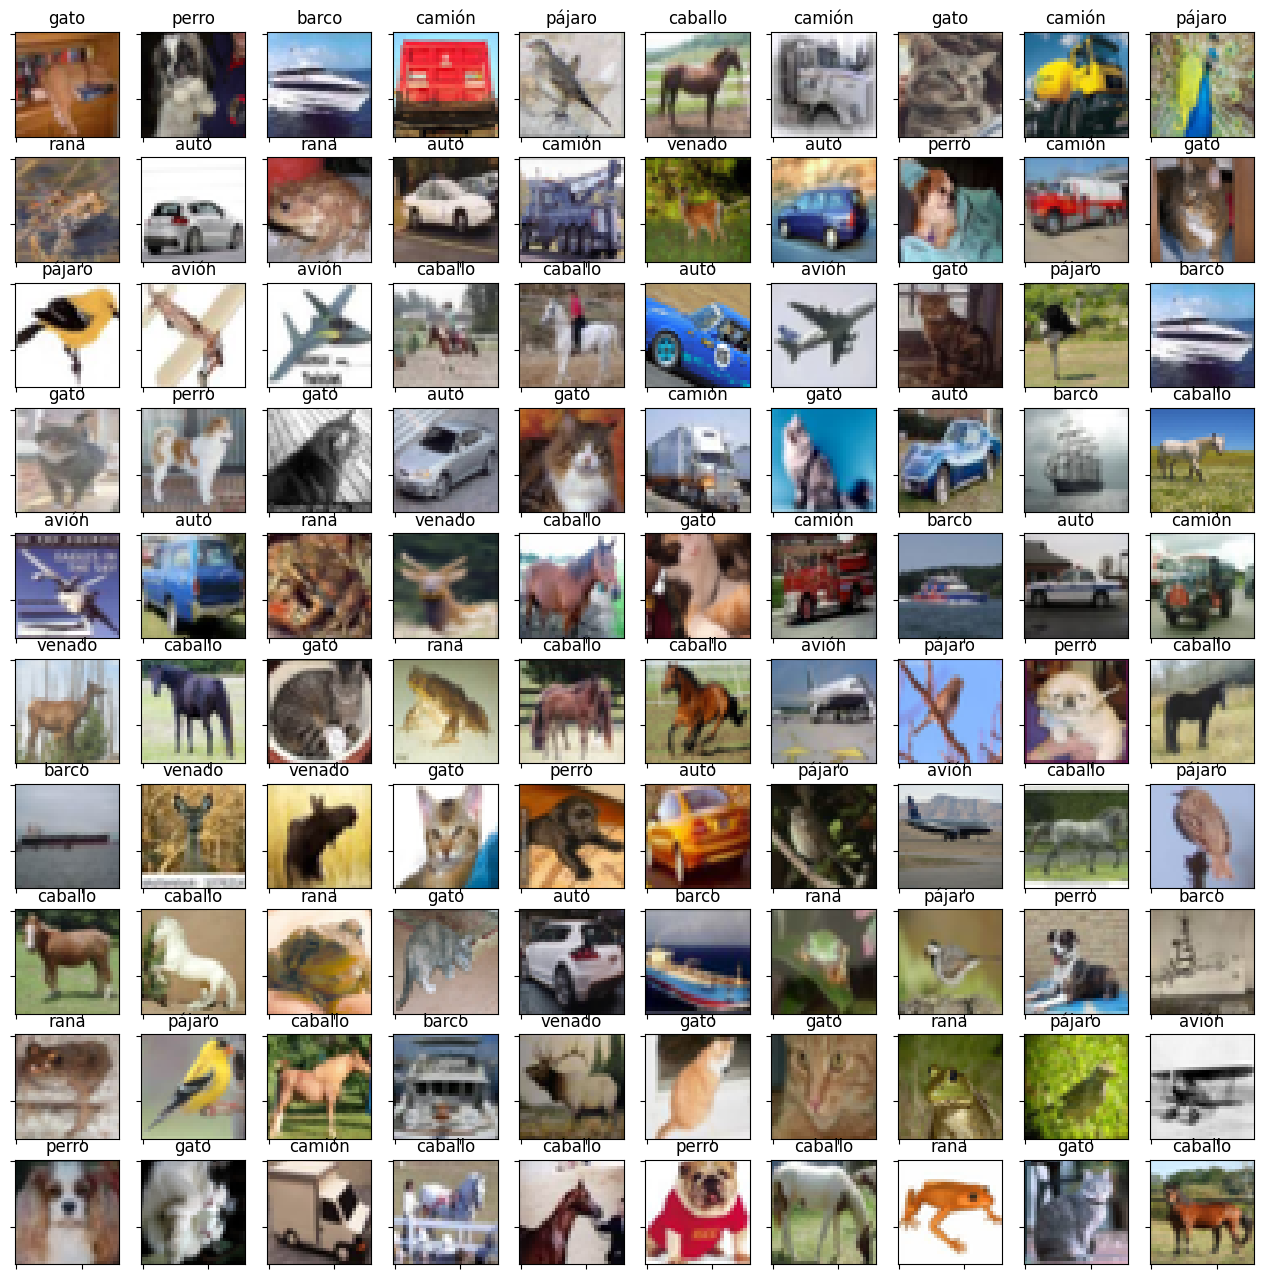

In [14]:
# Mostramos una grilla de ejemplos (al azar)

h = 10 # alto de la grilla
w = 10 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])

In [11]:
# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(50000,32*32*3)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(50000, 3072)
(50000, 10)


In [17]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

50000 3072 10


In [27]:
# tamaños de capas escondidas

h1 = 512
h2 = 256
h3 = 64

### 1.1 MODELO 1 - SGD

In [28]:
# nuestra red feed-forward

model_sgd = keras.Sequential()
model_sgd.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd.summary()

/home/cristobal/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
sgd=SGD(learning_rate=0.01)
model_sgd.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h = model_sgd.fit(X, Y,
        epochs=50,
        batch_size=100,
       )

Epoch 1/50


2024-05-04 11:43:01.808751: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.2953 - loss: 1.9352
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3308 - loss: 1.8487
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3455 - loss: 1.8067
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3627 - loss: 1.7669
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3758 - loss: 1.7331
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3866 - loss: 1.7003
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3979 - loss: 1.6743
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4137 - loss: 1.6438
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4238 - loss: 1.6195
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4317 - loss: 1.5955
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4431 - loss: 1.5659
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms

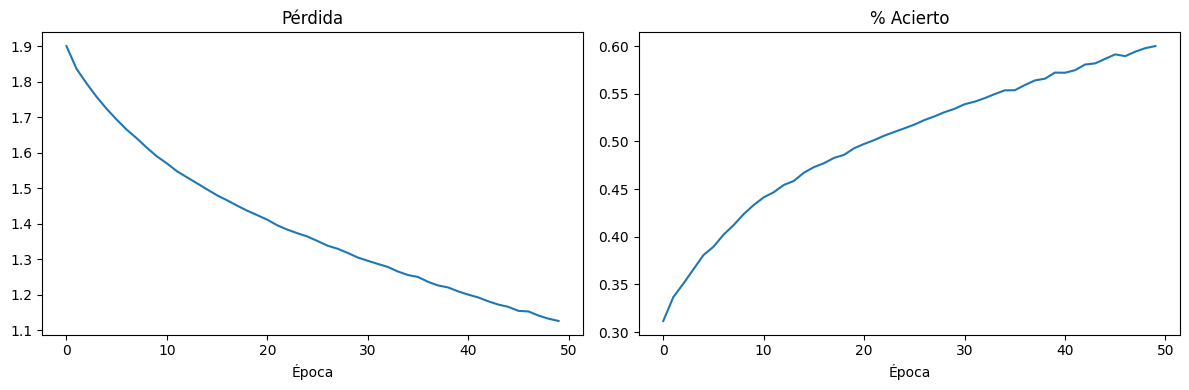

In [39]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

### 1.2 MODELO 2 - ADAM

In [41]:
# nuestra red feed-forward

model_adam = keras.Sequential()
model_adam.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_adam.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam.summary()

/home/cristobal/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam = model_adam.fit(X, Y,
        epochs=50,
        batch_size=100,
       )

Epoch 1/50


2024-05-04 12:26:16.564037: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.2727 - loss: 2.0117
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.3958 - loss: 1.6814
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.4331 - loss: 1.5845
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.4563 - loss: 1.5239
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.4761 - loss: 1.4696
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.4885 - loss: 1.4313
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.4997 - loss: 1.3969
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5081 - loss: 1.3788
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5281 - loss: 1.3274
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5335 - loss: 1.3045
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5390 - loss: 1.2819
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 

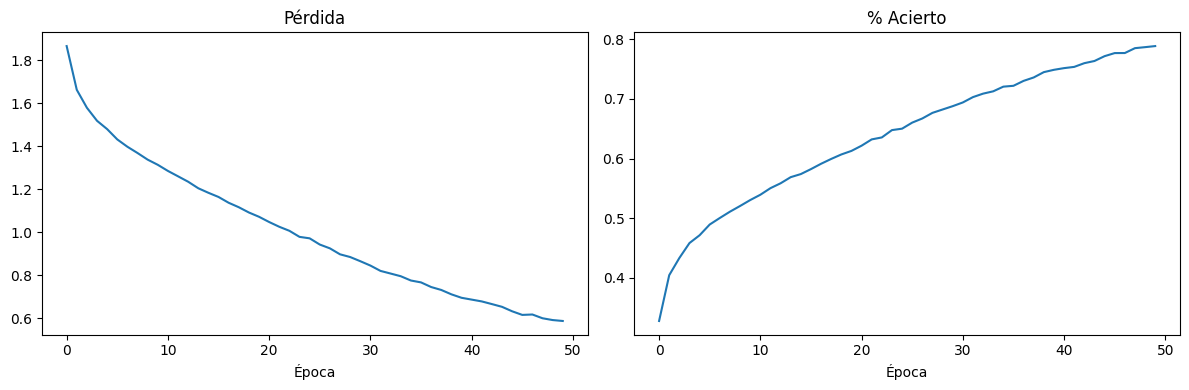

In [43]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ __ capas ocultas }& {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

### 3.1 MODELO 1 - SGD + 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

Justificar y hacer análisis aquí.

## Parte 4. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ __ capas } & \text { __ epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1 

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon. 

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso. 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.
 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.